In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
    
from konlpy.tag import Twitter
from collections import Counter
from wordcloud import WordCloud

In [3]:
def get_font_family():
    import platform
    system_name = platform.system()
    
    if system_name == 'Darwin' :
        font_family = 'AppleGothic'
    elif system_name == 'Windows':
        font_family = 'Malgun Gothic'
    else :
        !apt-get install fonts-nanum -qq > /dev/null
        !fc-cache -fv
        
        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = 'NanumBarunGothic'
    return font_family
plt.style.use('seaborn')
plt.rc('font', family=get_font_family())
plt.rc('axes', unicode_minus=False)

%config InlineBackend.figure_format = 'retina'

In [4]:
get_font_family()

'Malgun Gothic'

# 기사 크롤링

In [5]:
import os
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time
import re
from datetime import datetime
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support.select import Select

## 뉴스 기사 사이트 (빅카인즈) -> 3개월치

In [801]:
options = webdriver.ChromeOptions()
options.add_argument('headless')

In [52]:
browser = webdriver.Chrome('C:/Users/dlrud/OneDrive - Sejong University/Self/Python/웹 크롤링 - fs/chromedriver.exe')
browser.maximize_window()
url = 'https://www.bigkinds.or.kr/'
browser.get(url)

C:\Users\dlrud\AppData\Local\Temp\ipykernel_11952\3615325761.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  browser = webdriver.Chrome('C:/Users/dlrud/OneDrive - Sejong University/Self/Python/웹 크롤링 - fs/chromedriver.exe')


In [53]:
browser.find_element(By.CLASS_NAME, 'search-key').send_keys('인플레이션')
browser.find_element(By.CLASS_NAME, 'search-key').send_keys(Keys.ENTER)

In [65]:
browser.find_element(By.ID, 'collapse-step-1').click()

In [55]:
# 처음 브라우저 킬시만 사용
browser.find_element(By.CLASS_NAME, 'tab-btn-inner' and 'tab1').click()

In [66]:
date_start = input('검색할 시작 날짜 : ')
date_end = input('검색할 마지막 날짜 : ')

for i in range(10):
    browser.find_element(By.ID, 'search-begin-date').send_keys(Keys.BACK_SPACE)
browser.find_element(By.ID, 'search-begin-date').send_keys(date_start)
for i in range(10):
    browser.find_element(By.ID, 'search-end-date').send_keys(Keys.BACK_SPACE)
browser.find_element(By.ID, 'search-end-date').send_keys(date_end)

browser.find_element(By.CLASS_NAME, 'btn' and 'btn-search' and 'news-search-btn' and 'news-report-search-btn').click()
time.sleep(1)

select = Select(browser.find_element(By.ID, 'select2'))
select.select_by_value('100')

# 2022-10-16까지

검색할 시작 날짜 : 2022-09-15
검색할 마지막 날짜 : 2022-09-17


In [67]:
news_list = []
count = browser.find_elements(By.CLASS_NAME, 'lastNum')[1].text
for c in range(2,int(count)):
    total_info = browser.find_element(By.ID, 'news-results')
    news = total_info.find_elements(By.CLASS_NAME,'news-item')
    
    for n in news:
        n.click()
        time.sleep(2)
        body = browser.find_element(By.CSS_SELECTOR, 'body')
        cc = body.find_element(By.CLASS_NAME, 'item1')
        bb = cc.find_element(By.CLASS_NAME,'info')
        news_date = bb.find_elements(By.TAG_NAME,'li')[0].text
        news_text = body.find_element(By.CLASS_NAME, 'news-view-body').text
        aa = browser.find_element(By.CLASS_NAME, 'news-view-head')
        news_title = aa.find_element(By.CLASS_NAME, 'title').text
        news_list.append([news_date, news_title, news_text])

        body.send_keys(Keys.ESCAPE)
        time.sleep(2)
        
    a1 = browser.find_elements(By.XPATH, '//*[@id="paging_news_result"]')
    if c+2 > 10 :
        a1[-2].send_keys(Keys.BACK_SPACE)
        
    a1[-2].send_keys(Keys.BACK_SPACE)
    a1[-2].send_keys(c+2)
    a1[-2].send_keys(Keys.ENTER)
    time.sleep(2)
    

In [6]:
# df_result = pd.read_excel('result.xlsx')

In [68]:
df = pd.DataFrame(news_list, columns=['날짜', '제목', '내용'])

In [69]:
df_result = df_result.append(df)

C:\Users\dlrud\AppData\Local\Temp\ipykernel_11952\2961200697.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(df)


In [70]:
df_result.reset_index(drop=True,inplace=True)
df_result = df_result.drop_duplicates()
df_result.tail(10)

,날짜,제목,내용,전처리 제목
11798,2022-09-15,[사진] 바이든 ‘인플레 감축법’ 입법 자축,바이든 ‘인플레 감축법’ 입법 자축\n조 바이든 미국 대통령(왼쪽)이 13일(현지시...,NaN
11799,2022-09-15,"또 미국발 물가쇼크, 원화값 1400원 눈앞",그래픽=박경민 기자 minn@joongang.co.kr\n미국발 물가충격에 금융시장...,NaN
11800,2022-09-15,"바이든, 동맹보다 ‘표심’…한·미 ‘포괄적 동맹’ 무색해졌다",지난 5월 서울 하얏트호텔에서 열린 ‘한·미 비즈니스 라운드테이블’에서 이창양 산업...,NaN
11801,2022-09-15,[사설] 美금리 1%포인트 인상 공포에 환율 1400원 비상이다,"14일 전 세계 자산시장이 올 들어 최악의 하루를 보냈다. 주가는 곤두박질치고, 달...",NaN
11802,2022-09-15,[사설] 인플레 지속 신호…비상 플랜 세우고 구조 개혁 서두를 때다,미국발(發) 인플레이션이 상당 기간 지속될 것이라는 신호가 나왔다. 미국 노동통계국...,NaN
11803,2022-09-15,[사설]‘예상 깬 美 물가’ 쇼크… ‘인플레’ 한순간도 방심 말란 경고다,[사설]\nAP 뉴시스\n지난달 미국 소비자물가 상승률이 예상보다 높게 나타나면서 ...,NaN
11804,2022-09-15,[사설] 미국 물가 쇼크 환율 방어·수출 활로 부담 더 커졌다,대외 악재 전방위로 국내 경제 압박…정교한 정책 공조·발 빠른 대처 요구\n미국의 ...,NaN
11805,2022-09-15,[사자성어로 읽는 고전] 상구내궁: 입을 숭상하면 곤궁해질 때가 있다,가끔은 자신의 마음을 표현할 때 그 마음이 전달이 되지 않는 경우가 있다. 고의적으...,NaN
11806,2022-09-15,‘美 인플레 공포’에 원·달러 환율 1390원 돌파,17.3원 오른 1390.9원에 거래 마감\n하루새 원·달러 환율이 20원 가까이 ...,NaN
11807,2022-09-15,‘○○플레이션’,김 종 민\n올해 초 러시아의 우크라이나 침공으로 석유·가스·곡물·해바라기씨유 등의...,NaN


In [74]:
df_result['날짜'].unique()

array(['2022-10-01', '2022-10-02', '2022-10-03', '2022-10-04',
       '2022-10-05', '2022-10-06', '2022-10-07', '2022-10-08',
       '2022-10-09', '2022-10-10', '2022-10-11', '2022-10-12',
       '2022-10-13', '2022-10-14', '2022-10-15', '2022-10-16',
       '2022-10-17', '2022-10-18', '2022-10-19', '2022-10-20',
       '2022-10-21', '2022-10-22', '2022-10-23', '2022-10-24',
       '2022-10-25', '2022-10-26', '2022-10-27', '2022-10-28',
       '2022-10-29', '2022-10-30', '2022-10-31', '2022-11-01',
       '2022-11-02', '2022-11-03', '2022-11-04', '2022-11-05',
       '2022-11-06', '2022-11-07', '2022-11-08', '2022-11-09',
       '2022-11-10', '2022-11-11', '2022-11-12', '2022-11-13',
       '2022-11-14', '2022-11-15', '2022-11-16', '2022-11-17',
       '2022-11-18', '2022-11-19', '2022-11-20', '2022-11-21',
       '2022-11-22', nan, '2022-09-30', '', '2022-09-29', '2022-09-28',
       '2022-09-27', '2022-09-26', '2022-09-25', '2022-09-24',
       '2022-09-23', '2022-09-22', '2022-09-21

In [71]:
df_result.to_excel('result.xlsx', index=None)

## train 데이터 가져오기

In [126]:
train = pd.read_excel('2022.01.01~11.25 인플레이션 뉴스 제목.xlsx')
train = train[['일자', '제목', '통합 분류1', '통합 분류2', '통합 분류3']]

In [127]:
train.head()

,일자,제목,통합 분류1,통합 분류2,통합 분류3
0,20220914,"LH, 임대주택 지을 때마다 1억8000만원씩 적자",경제>부동산,정치>국회_정당,정치>청와대
1,20220914,美 물가 발표 여파에 원 달러 환율 1390원 돌파...13년 5개월 만,경제>국제경제,경제>외환,경제>증권_증시
2,20220914,"미국 유럽 경기침체 암운 한은 ""유럽발 공급충격, 국내 물가 악영향 가능성""",경제>국제경제,경제>외환,NaN
3,20220914,"휘발유값 잡아도 美친 물가 금리, 연내 4.5% 찍나",경제>국제경제,경제>외환,경제>증권_증시
4,20220914,증시 폭락에 제프 베이조스 자산 하루 새 13조 증발,국제>미국_북미,경제>국제경제,경제>증권_증시


## 데이터 전처리

In [128]:
def preprocessing(text):
    # 개행문자 제거
    text = re.sub('\\\\n', ' ', str(text))
    text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-z]', ' ', str(text))
    text = re.sub('[\s]+', ' ', str(text))
    text = str(text).lower()
    return text

In [129]:
df_result['전처리 제목'] = df_result['제목'].map(preprocessing)

In [130]:
train['제목'] = train['제목'].map(preprocessing)

In [131]:
train['토픽1'] = train['통합 분류1'].map(lambda x : x.split('>')[0])

In [132]:
train.head()

,일자,제목,통합 분류1,통합 분류2,통합 분류3,토픽1
0,20220914,lh 임대주택 지을 때마다 억 만원씩 적자,경제>부동산,정치>국회_정당,정치>청와대,경제
1,20220914,물가 발표 여파에 원 달러 환율 원 돌파 년 개월 만,경제>국제경제,경제>외환,경제>증권_증시,경제
2,20220914,미국 유럽 경기침체 암운 한은 유럽발 공급충격 국내 물가 악영향 가능성,경제>국제경제,경제>외환,NaN,경제
3,20220914,휘발유값 잡아도 친 물가 금리 연내 찍나,경제>국제경제,경제>외환,경제>증권_증시,경제
4,20220914,증시 폭락에 제프 베이조스 자산 하루 새 조 증발,국제>미국_북미,경제>국제경제,경제>증권_증시,국제


## 불용어 처리

In [133]:
# 불용어 가져오기
stopwords = pd.read_excel('불용어.xlsx')
stopwords = stopwords['아'].tolist()
stopwords.append('아')

In [134]:
def remove_stopwords(text):
    tokens = str(text).split(' ')
    meaningful_words = [w for w in tokens if not w in stopwords]
    return ' '.join(meaningful_words)

In [135]:
train['제목'] = train['제목'].map(remove_stopwords)

In [136]:
df_result['전처리 제목'] = df_result['전처리 제목'].map(remove_stopwords)

In [137]:
train['토픽1'].unique()

array(['경제', '국제', '정치', '지역', 'IT_과학', '문화', '사회', '미분류', '스포츠'],
      dtype=object)

In [138]:
dic = {'경제' : 0, '스포츠' : 1, '국제':2, '정치':3, '문화':4, 'IT_과학':5, '사회':6, '지역':7}

topic = pd.DataFrame(data=dic.values(), index=dic.keys(), columns=['토픽'])

In [139]:
train.dropna(inplace=True)

In [140]:
train = train.merge(topic, how='left', left_on='토픽1', right_on=topic.index)

In [141]:
train

,일자,제목,통합 분류1,통합 분류2,통합 분류3,토픽1,토픽
0,20220914,lh 임대주택 지을 때마다 억 만원씩 적자,경제>부동산,정치>국회_정당,정치>청와대,경제,0
1,20220914,물가 발표 여파에 원 달러 환율 원 돌파 개월 만,경제>국제경제,경제>외환,경제>증권_증시,경제,0
2,20220914,휘발유값 잡아도 친 물가 금리 연내 찍나,경제>국제경제,경제>외환,경제>증권_증시,경제,0
3,20220914,증시 폭락에 제프 베이조스 자산 하루 새 조 증발,국제>미국_북미,경제>국제경제,경제>증권_증시,국제,2
4,20220914,일본 국채 금리 급등 엔화 엔 육박 boj 환시 개입 준비,국제>일본,경제>외환,국제>중국,국제,2
...,...,...,...,...,...,...,...
31287,20220101,코스피 최고치 전망 추천 업종은 반도체,경제>증권_증시,경제>국제경제,경제>외환,경제,0
31288,20220101,거품 낀 세계경제 또다른 충격 온다 vs 증시 오른다,경제>국제경제,경제>외환,경제>증권_증시,경제,0
31289,20220101,만명 실손보험료 인상 일부 고령층 배로,경제>국제경제,경제>유통,경제>자동차,경제,0
31290,20220101,최태원 도전은 기업의 숙명 허태수 사업 생태계 확장 권오갑 혁신으로 가치 창출,경제>자동차,경제>산업_기업,IT_과학>과학,경제,0


## 워드클라우드

In [142]:
from wordcloud import WordCloud

def display_word_cloud(data, width=1200, height=500):
    word_draw = WordCloud(
        font_path =r'C:\Windows\Fonts\malgun.ttf',
        width=width, height=height,
        stopwords=['합니다', '입니다'],
        background_color='white',
        random_state=42
    )
    word_draw.generate(data)
    plt.figure(figsize=(15,7))
    plt.imshow(word_draw)
    plt.axis('off')
    plt.show()

In [143]:
content = ' '.join(train['제목'].tolist())

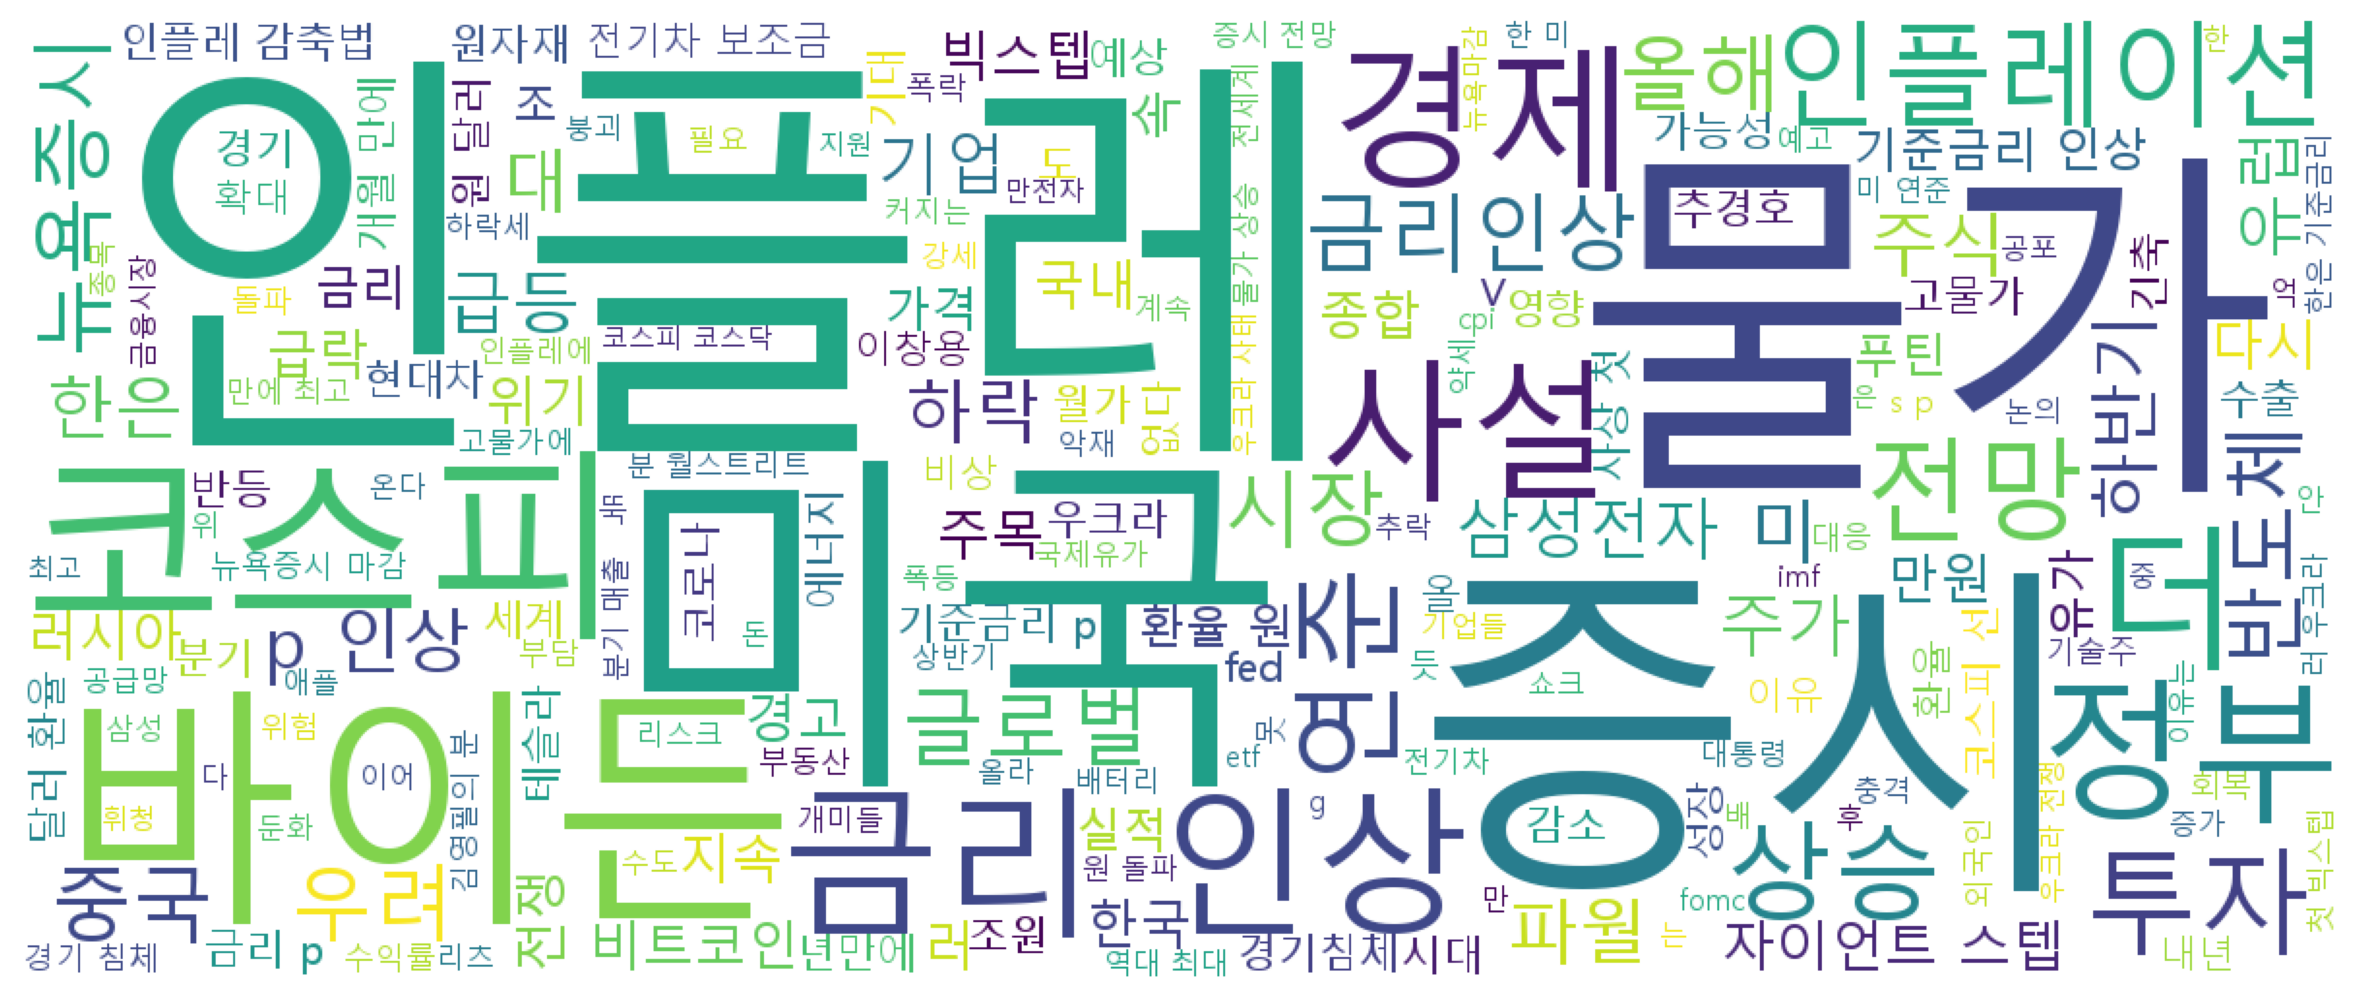

In [144]:
display_word_cloud(content)

## 벡터화

In [145]:
y_train = train['토픽']

In [146]:
from sklearn.feature_extraction.text import CountVectorizer

X_train_text = train['제목']
y_train_text = train['토픽1']
X_test_text = df_result['전처리 제목']

cvect = CountVectorizer(max_df=1.0, min_df=0.01)
cvect.fit(X_train_text)

CountVectorizer(min_df=0.01)

In [147]:
X_train = cvect.transform(X_train_text)
X_test = cvect.transform(X_test_text)

X_train.shape, X_test.shape

((31292, 71), (11799, 71))

## 모델링 (분류 - 의사결정나무)

In [148]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=10)

In [149]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [150]:
feature_names = cvect.get_feature_names_out()
feature_names

array(['가격', '가능성', '개월', '경기', '경기침체', '경제', '공포', '글로벌', '금리', '금리인상',
       '급등', '급락', '기업', '기준금리', '긴축', '나스닥', '년만에', '뉴욕증시', '달러', '돌파',
       '러시아', '마감', '만에', '물가', '미국', '바이든', '반도체', '반등', '분기', '비트코인',
       '빅스텝', '사상', '사설', '삼성전자', '상승', '성장률', '세계', '스텝', '시대', '시장',
       '실적', '연속', '연준', '올해', '우려', '우크라', '위기', '유가', '유럽', '인상', '인플레',
       '인플레이션', '전기차', '전망', '전쟁', '정부', '주가', '주식', '중국', '증시', '최고',
       '최대', '침체', '코스피', '투자', '파월', '하락', '하반기', '한국', '한은', '환율'],
      dtype=object)

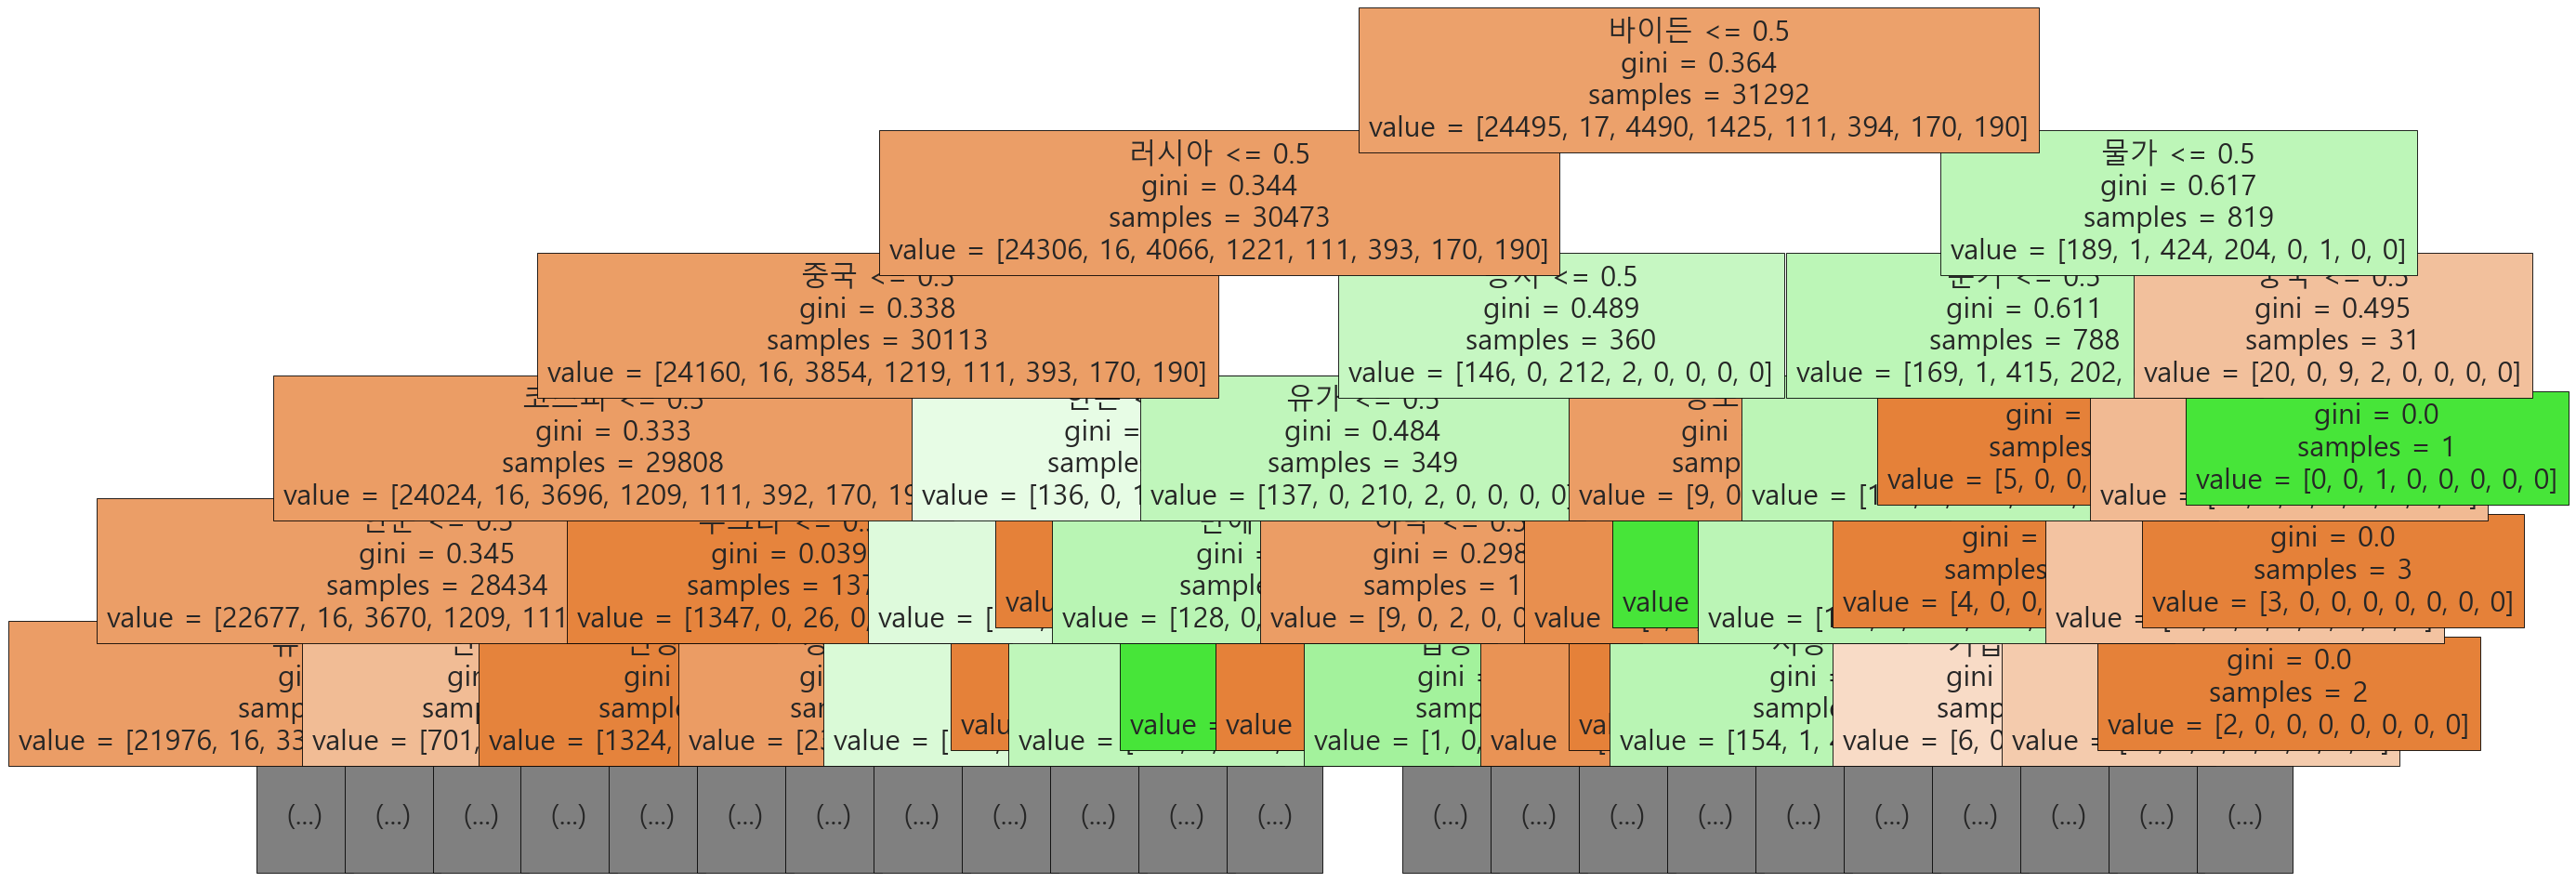

In [151]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15,6))
plot_tree(model, max_depth=5, feature_names=feature_names, fontsize=11, filled=True)
plt.show()

In [152]:
fim = pd.Series(model.feature_importances_)
fim.index = feature_names
fim_large = fim.nlargest(60)

<AxesSubplot:>

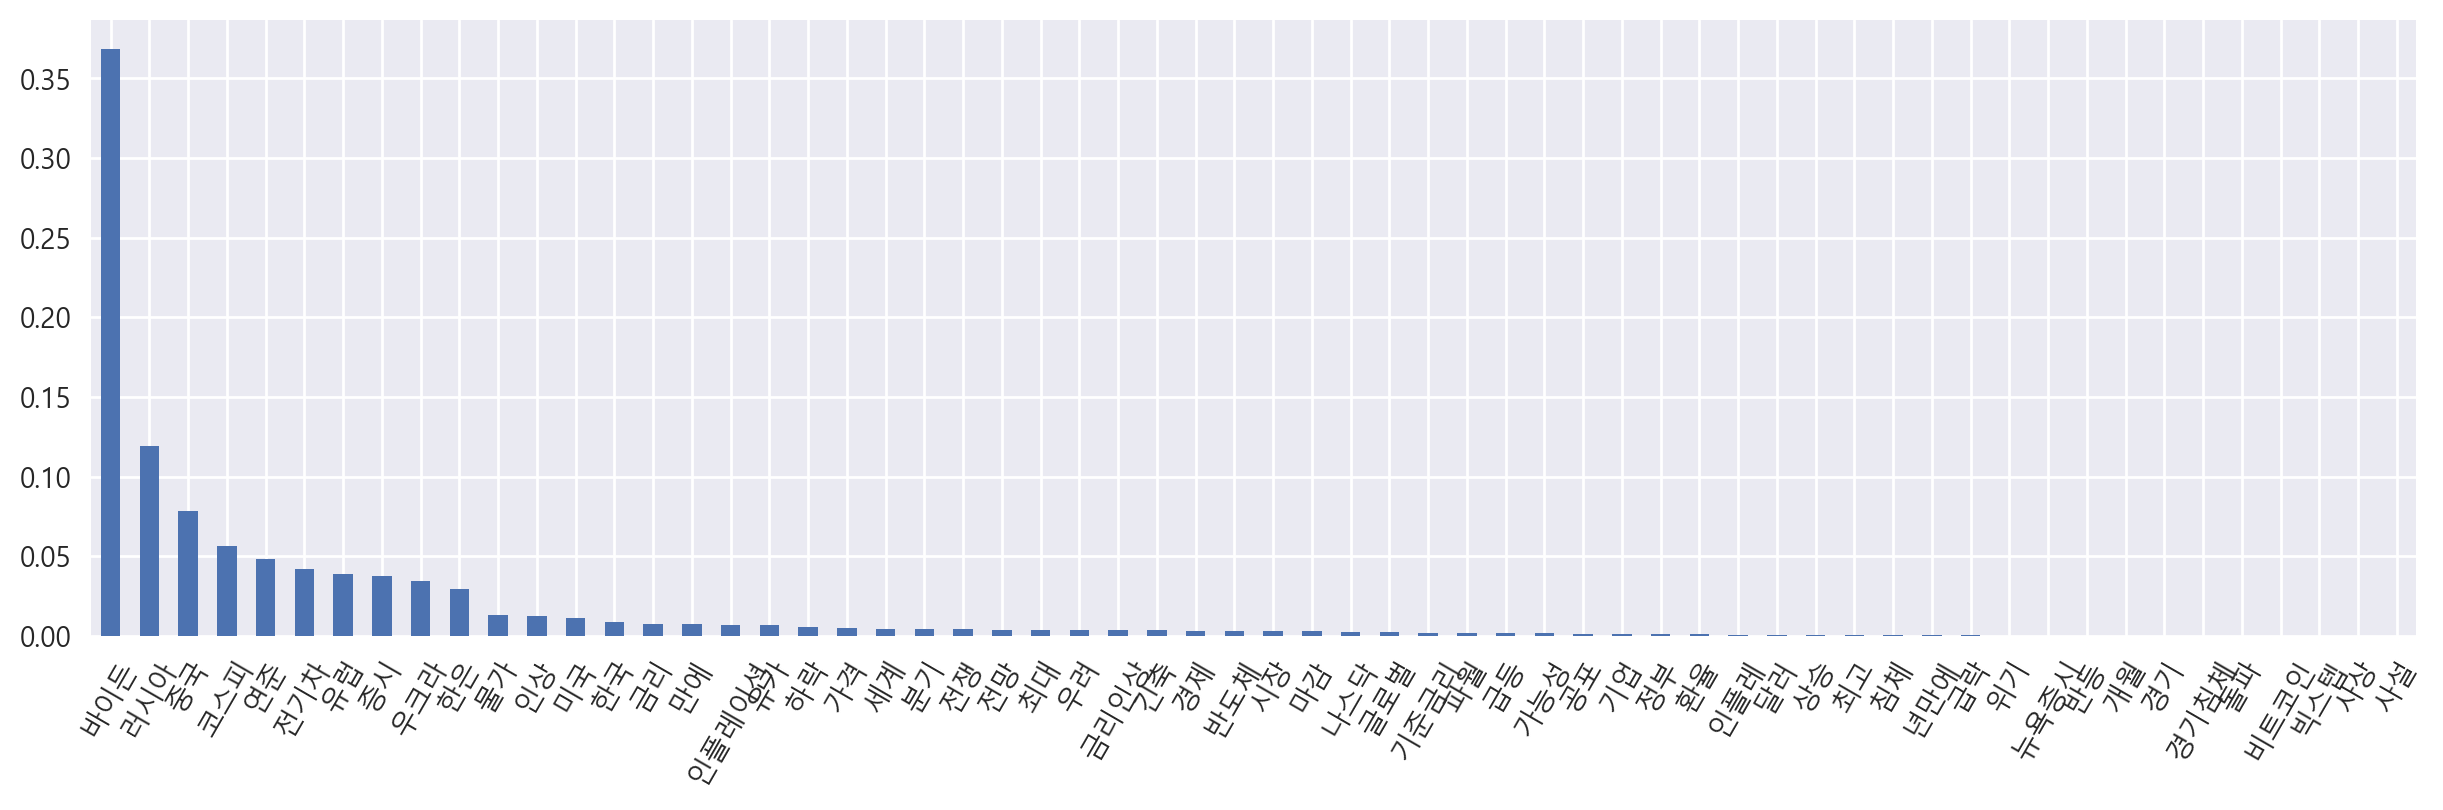

In [153]:
fim_large.plot.bar(rot=60, figsize=(15,4))

## 예측

In [120]:
df_result = pd.read_excel('result.xlsx')

In [154]:
pred = model.predict(X_test)

In [155]:
pred.shape

(11799,)

In [156]:
df_result['예측 토픽'] = pred

In [157]:
df_result.head()

,날짜,제목,내용,전처리 제목,예측 토픽
0,2022-10-01,출구 안 보이는 '순방' 후폭풍...사라진 협치,"■ 진행 : 송경철 앵커\n■ 출연 : 이종근 시사평론가, 유용화 한국외대 초빙교수...",출구 안 보이는 순방 후폭풍 사라진 협치,0
1,2022-10-01,"""필요하면 달러 빌려주겠지만 아직은..."" 한미 재무장관 공감대","추경호, 옐런과 통화... '유동성 공급' 재논의美인플레감축법 우려에 '각별한 관심...",필요하면 달러 빌려주겠지만 아직은 한미 재무장관 공감대,0
2,2022-10-01,"추경호·옐런 ""한국 금융불안 심화시 유동성 공급 실행""",추경호 부총리 겸 기획재정부 장관이 30일 오후 서울 종로구 정부서울청사에서 재닛 ...,추경호 옐런 한국 금융불안 심화시 유동성 공급 실행,0
3,2022-10-01,한미 경제수장 “필요시 유동성 공급 협력”,이런 가운데 한미 경제수장들이 필요하면 외화 유동성 공급을 위해 협력하겠다는 입장을...,한미 경제수장 필요시 유동성 공급 협력,0
4,2022-10-01,"추경호-앨런, ""한미 금융불안 심화시 유동성 공급 준비돼 있어""","한미 재무 컨퍼런스 콜, ""한국 외화유동성 양호…견고한 대외건전성"" 원달러 환율 상...",추경호 앨런 한미 금융불안 심화시 유동성 공급 준비돼 있어,0


In [106]:
pd.Series(pred).value_counts()

0    11285
2      460
3       54
dtype: int64

In [168]:
topic

,토픽
경제,0
스포츠,1
국제,2
정치,3
문화,4
IT_과학,5
사회,6
지역,7


In [160]:
topic_dict = topic.to_dict()

In [165]:
topic_dict = topic_dict['토픽']

In [171]:
df_result['예측 토픽'].replace({0:'경제', 1:'스포츠', 2:'국제', 3:'정치', 4:'문화', 5:'IT_과학',6:'사회', 7:'지역'}, inplace=True)

In [178]:
df_result = df_result[df_result['예측 토픽'] == '경제']

In [179]:
df_result.to_excel('경제만 추출.xlsx', index=None)